<a href="https://colab.research.google.com/github/mohamedalifaragitiai/Video-captioning-using-deep-learning-with-greedy-search/blob/main/Video_to_Text_Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
import tensorflow_hub as hub
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.lib.display import YouTubeVideo

In [ ]:
# log into drive from colab
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive



# Extract video frame features using an EfficientNet

In [ ]:
os.chdir('/content/drive/MyDrive/MyMaster/Final VD/Data')

In [ ]:
training_videos_path = os.path.dirname(os.getcwd()) + '/Data/YouTubeClips'
training_videos_path

'/content/drive/MyDrive/MyMaster/Final VD/Data/YouTubeClips'

In [ ]:
file_Path, empty_list, filenames = next(os.walk(training_videos_path)) # 1970 videos

In [ ]:
print(file_Path)
print(empty_list)
print(filenames[:3])

/content/drive/MyDrive/MyMaster/Final VD/Data/YouTubeClips
[]
['jmoT2we_rqo_0_5.avi', 'Sj6GSmDpNDw_0_12.avi', 'q7pOFn8s4zc_263_273.avi']


In [ ]:
working_filenames = [v for v in filenames if not v.startswith(".")] # 1970 videos

In [ ]:
# make sure only videos are kept
working_filenames = [v for v in working_filenames if v.endswith(".avi")] # 1970 videos

In [ ]:
working_filenames[0]

'jmoT2we_rqo_0_5.avi'

In [ ]:
len(working_filenames)

1150

In [ ]:
working_video_names = [x[:-4] for x in working_filenames]
print(working_video_names[:3])

['jmoT2we_rqo_0_5', 'Sj6GSmDpNDw_0_12', 'q7pOFn8s4zc_263_273']


In [ ]:
def extract_frames_from_video(video_name):
    path_input = os.path.dirname(os.getcwd()) + '/Data/YouTubeClips/'+ video_name + ".avi"

    cap = cv2.VideoCapture(path_input)
    cap.set(cv2.CAP_PROP_POS_AVI_RATIO, 0)

    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    videoFPS = int(cap.get(cv2.CAP_PROP_FPS))

    buffer = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype("uint8"))

    fc = 0
    while fc < frameCount:
        ret, buffer[fc] = cap.read()
        fc += 1

    representative_frames = buffer[::videoFPS, :, :, :] # ::videoFPS means for start to end with step # videoFPS

    cap.release()
    del buffer
    del cap

    return representative_frames

In [ ]:
frames = extract_frames_from_video("d")

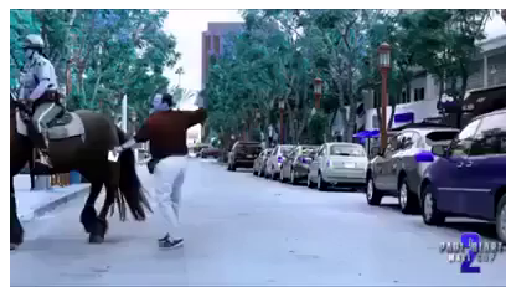

In [ ]:
plt.imshow(frames[0], interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
m = tf.keras.Sequential(
    [
        hub.KerasLayer(
            "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
            trainable=False,
        ),
    ]
)
# m.build([None, expect_img_size, expect_img_size, 3])  # Batch input shape.
m.build([None, 600, 600, 3])  # Batch input shape.

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2560)              64097680  
                                                                 
Total params: 64,097,680
Trainable params: 0
Non-trainable params: 64,097,680
_________________________________________________________________


In [ ]:
def extract_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)
    return frames_features

In [ ]:
features = extract_features_from_video_frames(working_video_names[0])

1/1 [==============================] - 13s 13s/step


In [ ]:
features.shape

(6, 2560)

In [ ]:
features_path = os.path.dirname(os.getcwd()) + '/Data/video_frame_features/'
np.save(features_path + working_video_names[0], features)

In [ ]:
def save_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)

    features_path = os.path.dirname(os.getcwd()) + '/Data/video_frame_features/'
    np.save(features_path + video_name, frames_features)

In [ ]:
from tqdm import tqdm

In [ ]:
_, _, features_files = next(os.walk(features_path))

In [ ]:
features_files = [x[:-4] for x in features_files]

In [ ]:
print(features_files)

['-_hbPLsZvvo_19_26', 'JXSkYkiKO0I_42_46', 'TxzxPyfsSxY_0_10', 'G6w6kO8UPyg_31_41', 'tIMDKdMnNYM_266_273', 'GcfWD62sbcs_13_33', 'zMg9dChF97A_12_38', 'o2X6UCaNqKA_27_36', 'YmXCfQm0_CA_277_284', '4QdX5Q3qQsQ_38_44', 'ao-9B8IV9_E_175_187', '-t-ZWaJeH-o_0_15', 'NbOlG7THecM_25_34', 'iCiGjZEV7VI_65_75', '0lh_UWF9ZP4_82_87', 'TwQzFqBqgeA_0_10', '_yUiusXxfWI_150_165', 'FH8vgAp4VDU_10_14', '_WRC7HXBJpU_395_401', 'K6xy6C-Hsa0_2_28', 'q8t7iSGAKik_11_31', 'XNV7hKVu-Xg_40_47', '0NPtAv3_uVI_46_54', '6t0BpjwYKco_179_183', '-uT_1VDvXok_8_15', 'ywHBKayhyvQ_19_28', 'dP15zlyra3c_0_10', 'ACOmKiJDkA4_121_128', '4lXdVS697DQ_10_25', '2YhDTpzxd3c_149_154', '_6OTzzK7t9Y_73_78', 'MJNStEgDKXU_3_10', 'vMoOpQQy6sI_22_55', 'onW5hJXnI5s_126_133', 'xgIIcPSh4EU_0_6', 'V--abChiVVc_30_40', 'bQJQGoJF7_k_162_169', 'WTf5EgVY5uU_15_19', 'HJHPB_Y8GZE_22_28', 'ptHkvYrH9fY_2_10', 'GY5Dl00LrEI_2_13', 'PBHZtoygOYg_450_465', 'Ted3imMggC0_48_58', 'PAm82v0AMFc_5_10', 'GyIs9B3A1Z0_0_7', 'qeKX-N1nKiM_106_115', 'L9wD3kw-8FE_65_73', 's

In [ ]:
len(features_files)

1478

In [ ]:
unprocessed_video_names = []

In [ ]:
for i in tqdm(range(len(working_video_names))):
    if(working_video_names[i] not in features_files):
        try:
            save_features_from_video_frames(working_video_names[i])
            features_files.append(working_video_names[i])
        except:
            unprocessed_video_names.append(working_video_names[i])
            continue

100%|██████████| 1150/1150 [00:00<00:00, 96883.65it/s]


In [ ]:
# nV3Wv8iHp4U_0_38
# 0piwbTivpDg_10_40
# eiyuac7hA4A_4_47
# JntMAcTlOF0_50_70
# QzulzuWr0Zw_20_45
# vulNlhUI6m0_7_27
# q8t7iSGAKik_57_74

# Load captions

In [ ]:
captions_path = os.path.dirname(os.getcwd()) + '/Data/AllVideoDescriptions.txt'

In [ ]:
with open(captions_path, 'r') as file:
    captions = file.readlines()

In [ ]:
del captions[:7]

In [ ]:
captions[:2]

['-4wsuPCjDBc_5_15 a squirrel is eating a peanut in it s shell\n',
 '-4wsuPCjDBc_5_15 a chipmunk     is eating\n']

In [ ]:
' '.join(captions[1].split()[1:])

'a chipmunk is eating'

In [ ]:
video_id, video_description = [], []

In [ ]:
for i, cap in enumerate(captions):
    video_id.append(captions[i].split()[0])
    video_description.append(' '.join(captions[i].split()[1:]))

In [ ]:
captions_dic = {'videoID': video_id, 'videoDescription': video_description}

In [ ]:
captions_df = pd.DataFrame(captions_dic)

In [ ]:
captions_df.head()

,videoID,videoDescription
0,-4wsuPCjDBc_5_15,a squirrel is eating a peanut in it s shell
1,-4wsuPCjDBc_5_15,a chipmunk is eating
2,-4wsuPCjDBc_5_15,a chipmunk is eating a peanut
3,-4wsuPCjDBc_5_15,a chipmunk is eating a nut
4,-4wsuPCjDBc_5_15,a squirrel is eating a nut


In [ ]:
captions_df[captions_df['videoID']=='d']

,videoID,videoDescription
80827,d,the horse


In [ ]:
# The length of captions in words
captions_df["videoDescription"].str.split().str.len().describe()

count    80828.000000
mean         7.025734
std          2.810604
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         45.000000
Name: videoDescription, dtype: float64

### Only keep captions for videos present in training data

In [ ]:
len(captions_df["videoID"].unique())

1971

In [ ]:
from pathlib import Path

In [ ]:
def check_if_video_exists(video_name):
    video_path = os.path.dirname(os.getcwd()) + '/Data/video_frame_features/' + video_name + ".npy"
    my_file = Path(video_path)

    if my_file.is_file():
        return True
    else:
        return False

In [ ]:
captions_df = captions_df[captions_df["videoID"].apply(check_if_video_exists)]

In [ ]:
len(captions_df)

60109

# Tokenize the captions

In [ ]:
captions_df["videoDescription"].iloc[0]

'a squirrel is eating a peanut in it s shell'

In [ ]:
# remove punctuation from the captions, all symbols to lowercase, split the caption into words
captions_df["videoDescription"] = (
    captions_df["videoDescription"]
    .str.replace(r"<br\s*/?>", r" ")
    .str.lower()
    .str.replace(r"[^a-zA-Z']", r" ")
    .str.split()
)

<ipython-input-48-847abc2a03f4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r"<br\s*/?>", r" ")
<ipython-input-48-847abc2a03f4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r"[^a-zA-Z']", r" ")


In [ ]:
captions_df["videoDescription"].head()

0    [a, squirrel, is, eating, a, peanut, in, it, s...
1                            [a, chipmunk, is, eating]
2                 [a, chipmunk, is, eating, a, peanut]
3                    [a, chipmunk, is, eating, a, nut]
4                    [a, squirrel, is, eating, a, nut]
Name: videoDescription, dtype: object

In [ ]:
captions_df["Description_length"] = captions_df["videoDescription"].map(len)

In [ ]:
captions_df["videoDescription"].values

array([list(['a', 'squirrel', 'is', 'eating', 'a', 'peanut', 'in', 'it', 's', 'shell']),
       list(['a', 'chipmunk', 'is', 'eating']),
       list(['a', 'chipmunk', 'is', 'eating', 'a', 'peanut']), ...,
       list(['a', 'young', 'child', 'is', 'using', 'an', 'exercise', 'machine']),
       list(['the', 'boy', 'is', 'exercising']), list(['the', 'horse'])],
      dtype=object)

In [ ]:
captions_df.head()

,videoID,videoDescription,Description_length
0,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, peanut, in, it, s...",10
1,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating]",4
2,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, peanut]",6
3,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, nut]",6
4,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, nut]",6


In [ ]:
word_array = np.concatenate(captions_df["videoDescription"].values)

In [ ]:
len(word_array)

421407

In [ ]:
from collections import Counter
vocabulary = Counter()

In [ ]:
vocabulary.update(word_array)

In [ ]:
vocabulary.most_common()[:10]

[('a', 67465),
 ('is', 33014),
 ('the', 21774),
 ('man', 17435),
 ('woman', 7504),
 ('on', 6907),
 ('in', 6729),
 ('playing', 6071),
 ('are', 5325),
 ('of', 4985)]

In [ ]:
len(vocabulary)

10822

In [ ]:
# only keep a word if the word appeared more than once
truncated_vocabulary = {k: v for (k, v) in vocabulary.items() if v > 1}

In [ ]:
vocab_size = len(truncated_vocabulary)
vocab_size

5970

In [ ]:
# dictionary for encoding words into ids
# do i need <unk> token or oob_ will cover the need?
word_to_id = {word: id_ + 3 for id_, word in enumerate(truncated_vocabulary)}
for id_, token in enumerate(("<pad>", "<bos>", "<eos>")):
    word_to_id[token] = id_

In [ ]:
caption_example = captions_df["videoDescription"].iloc[0]
caption_example

['a', 'squirrel', 'is', 'eating', 'a', 'peanut', 'in', 'it', 's', 'shell']

In [ ]:
for word in caption_example:
    print(word_to_id.get(word) or vocab_size)

3
4
5
6
3
7
8
9
10
11


In [ ]:
# dictionary for decoding
id_to_word = {id_: word for word, id_ in word_to_id.items()}

In [ ]:
encoded_caption_example = [word_to_id[word] for word in caption_example]
encoded_caption_example

[3, 4, 5, 6, 3, 7, 8, 9, 10, 11]

In [ ]:
[id_to_word[id_] for id_ in encoded_caption_example]

['a', 'squirrel', 'is', 'eating', 'a', 'peanut', 'in', 'it', 's', 'shell']

In [ ]:
words = tf.constant(list(id_to_word.values()))
word_ids = tf.constant(list(word_to_id.values()), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [ ]:
table.size()

<tf.Tensor: shape=(), dtype=int64, numpy=5974>

In [ ]:
vocab_size = len(words)

In [ ]:
vocab_size

5973

In [ ]:
caption_example

['a', 'squirrel', 'is', 'eating', 'a', 'peanut', 'in', 'it', 's', 'shell']

In [ ]:
table.lookup(tf.constant(caption_example))

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 3,  4,  5,  6,  3,  7,  8,  9, 10, 11])>

In [ ]:
def encode_words_to_id(word_list):
    return table.lookup(tf.constant(word_list))

## GloVe Embeddings

In [ ]:
path_to_glove_file = os.path.dirname(os.getcwd()) + '/Data/glove.6B.300d.txt'

embeddings_index = {}
with open(path_to_glove_file, encoding="utf8") as glove_file:
    for line in tqdm(glove_file):
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, dtype="f", sep=" ")
        embeddings_index[word] = coefs

400000it [00:27, 14577.35it/s]


In [ ]:
embed_size = 300
hits = 0
misses = 0
# Prepare embedding matrix
# initialize it randomly with values from -1 to 1
embedding_matrix = (np.random.rand(vocab_size + num_oov_buckets, embed_size) * 2) - 1
for word, i in word_to_id.items():
  #
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    #
    embedding_matrix[i] = embedding_vector
    hits += 1
  else:
    #
    misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 5624 words (349 misses)


In [ ]:
embedding_layer = keras.layers.Embedding(
    vocab_size + num_oov_buckets,
    embed_size,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=True,
    name="caption_embedding",
)

In [ ]:
del embeddings_index

## Subword tokenization

In [ ]:
# !pip install tokenizers

In [ ]:
# from tokenizers import Tokenizer
# from tokenizers.models import WordPiece

In [ ]:
# tokenizer = Tokenizer(WordPiece(unk_token="<unk>"))

In [ ]:
# vocab_size = 4000

In [ ]:
# from tokenizers.trainers import WordPieceTrainer

# trainer = WordPieceTrainer(vocab_size=vocab_size, special_tokens=["<pad>", "<bos>", "<eos>", "<unk>"])

In [ ]:
# from tokenizers.pre_tokenizers import Whitespace

# tokenizer.pre_tokenizer = Whitespace()

In [ ]:
# captions_df["Description"].values

In [ ]:
# # remove punctuation from the captions, all symbols to lowercase
# captions_df["Description"] = (
#     captions_df["Description"]
#     .str.replace(r"<br\s*/?>", r" ")
#     .str.lower()
#     .str.replace(r"[^a-zA-Z']", r" ")
#     .values
# )

In [ ]:
# tokenizer.train_from_iterator(captions_df["Description"].values, trainer)

In [ ]:
# output = tokenizer.encode("the man chops onionsss")

In [ ]:
# output.ids

In [ ]:
# captions_df["Description_encoded"] = captions_df["Description"].map(
#     lambda x: tokenizer.encode(x).ids
# )

In [ ]:
# captions_df["Description_encoded_length"] = captions_df["Description_encoded"].map(len)

# Prepare data for the model

In [ ]:
captions_df.head()

,videoID,videoDescription,Description_length
0,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, peanut, in, it, s...",10
1,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating]",4
2,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, peanut]",6
3,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, nut]",6
4,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, nut]",6


In [ ]:
def get_padded_data(caption_index):
    video_name = captions_df["videoID"].iloc[caption_index]

    stored_features_path = os.path.dirname(os.getcwd()) + '/Data/video_frame_features/' + video_name + ".npy"
    features_array = np.load(stored_features_path)
    video_features_shape = features_array.shape

    input_cnn_padding_length = captions_df["Description_length"].iloc[caption_index] + 1 # 1 for oov
    input_cnn_padding_array = np.full([input_cnn_padding_length, 2560], 0)
    input_cnn_padded_array = np.concatenate((features_array, input_cnn_padding_array))

    list_first_half = video_features_shape[0] * ["<pad>"]

    input_sequence_caption = list_first_half + ["<bos>"] + captions_df["videoDescription"].iloc[caption_index]
    target_sequence_caption = list_first_half + captions_df["videoDescription"].iloc[caption_index] + ["<eos>"]

    return [input_cnn_padded_array, input_sequence_caption], target_sequence_caption

In [ ]:
[input_cnn, input_caption], target_caption = get_padded_data(1)

In [ ]:
print(len(input_cnn))
print(len(input_caption))
print(len(target_caption))

16
16
16


In [ ]:
input_cnn.shape

(16, 2560)

In [ ]:
target_caption

['<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 'a',
 'chipmunk',
 'is',
 'eating',
 '<eos>']

In [ ]:
input_caption

['<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<bos>',
 'a',
 'chipmunk',
 'is',
 'eating']

In [ ]:
video_name_list = []
number_of_frames_list = []

In [ ]:
video_features_path = os.path.dirname(os.getcwd()) + '/Data/video_frame_features/'
video_features_path

'/content/drive/MyDrive/MyMaster/Final VD/Data/video_frame_features/'

In [ ]:
_, _, filenames = next(os.walk(video_features_path))

In [ ]:
filenames[:2]

['-_hbPLsZvvo_19_26.npy', 'JXSkYkiKO0I_42_46.npy']

In [ ]:
# # after the first time, it may be faster to load the computed dict
# for filename in filenames:
#     np_path = video_features_path + filename
#     video_name_list.append(filename[:-4])
#     number_of_frames = np.load(np_path).shape[0]
#     number_of_frames_list.append(number_of_frames)

# video_frames_dict = dict(zip(video_name_list, number_of_frames_list))

In [ ]:
import pickle
# with open('video_frames_dict.pickle', 'wb') as handle:
#     pickle.dump(video_frames_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(os.path.dirname(os.getcwd()) + '/Data/video_frames_dict.pickle', "rb") as handle:
    video_frames_dict = pickle.load(handle)

In [ ]:
captions_df["Number_of_frames"] = captions_df["videoID"].map(video_frames_dict)

In [ ]:
captions_df.head()

,videoID,videoDescription,Description_length,Number_of_frames
0,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, peanut, in, it, s...",10,11
1,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating]",4,11
2,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, peanut]",6,11
3,-4wsuPCjDBc_5_15,"[a, chipmunk, is, eating, a, nut]",6,11
4,-4wsuPCjDBc_5_15,"[a, squirrel, is, eating, a, nut]",6,11


In [ ]:
def padding_part_of_caption_sequence(video_length):
    return video_length * ["<pad>"]

def append_bos_token(sequence_list):
    return sequence_list + ["<bos>"]

def append_eos_token(sequence_list):
    return sequence_list + ["<eos>"]


In [ ]:
# create padded caption to use as input, with <bos> token
captions_df["input_sequence_caption"] = captions_df["Number_of_frames"]\
                                        .apply(padding_part_of_caption_sequence) \
                                        .apply(append_bos_token) + captions_df["videoDescription"]

In [ ]:
# create padded caption to use as target, with <eos> token
captions_df["target_sequence_caption"] = captions_df["Number_of_frames"]\
                                        .apply(padding_part_of_caption_sequence) + captions_df["videoDescription"]\
                                        .apply(append_eos_token)

In [ ]:
captions_df.head()

In [ ]:
# convert caption sequences from list to numpy arrays
captions_df["input_sequence_caption"] = captions_df["input_sequence_caption"].apply(lambda x: np.array(x))
captions_df["target_sequence_caption"] = captions_df["target_sequence_caption"].apply(lambda x: np.array(x))

## Create data loading pipeline

In [ ]:
# training-validation split is about 80-20
train_size = 64660

In [ ]:
# features = ['input_sequence_caption', 'videoID', 'target_sequence_caption', 'Description_length']
training_dataset = tf.data.Dataset.from_tensor_slices(
    (
        tf.ragged.constant(
            captions_df["input_sequence_caption"].iloc[:train_size].values
        ),
        tf.ragged.constant(
            captions_df["target_sequence_caption"].iloc[:train_size].values
        ),
        tf.ragged.constant(captions_df["videoID"].iloc[:train_size].values),
        tf.ragged.constant(captions_df["Description_length"].iloc[:train_size].values)
    )
)

In [ ]:
# word tokenization
subsample_rate = 1

validation_dataset = tf.data.Dataset.from_tensor_slices(
    (
        tf.ragged.constant(
            captions_df["input_sequence_caption"]
            .iloc[train_size::subsample_rate]
            .values
        ),
        tf.ragged.constant(
            captions_df["target_sequence_caption"]
            .iloc[train_size::subsample_rate]
            .values
        ),
        tf.ragged.constant(
            captions_df["videoID"].iloc[train_size::subsample_rate].values
        ),
        tf.ragged.constant(
            captions_df["Description_length"].iloc[train_size::subsample_rate].values
        ),
    )
)

In [ ]:
captions_df["input_sequence_caption"].map(len).describe()

count    60109.000000
mean        18.859372
std          6.972307
min          5.000000
25%         14.000000
50%         17.000000
75%         21.000000
max         76.000000
Name: input_sequence_caption, dtype: float64

In [ ]:
# load video features array and pad it, return padded tensor
def get_padded_input_cnn(video_name_tensor, caption_length_tensor):
    stored_features_path = (os.path.dirname(os.getcwd()) + '/Data/video_frame_features/'
                           + video_name_tensor.numpy().decode("ascii") + ".npy")
    features_array = np.load(stored_features_path)

    input_cnn_padding_length = caption_length_tensor + 1
    input_cnn_padding_array = np.full([input_cnn_padding_length, 2560], 0)
    input_cnn_padded_array = np.concatenate((features_array, input_cnn_padding_array))
    return tf.constant(input_cnn_padded_array)

In [ ]:
for input_seq, target_seq, video_name, caption_length in training_dataset.take(1):
    print(get_padded_input_cnn(video_name, caption_length))

tf.Tensor(
[[-0.11117151  0.06840475  0.17291933 ... -0.10178307 -0.17902158
   0.02944427]
 [-0.18497883 -0.01959134  0.39816877 ... -0.13423958 -0.06738208
  -0.02982993]
 [-0.07405493 -0.0543845   0.40450001 ... -0.11281626 -0.08660042
  -0.04816832]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]], shape=(22, 2560), dtype=float64)


In [ ]:
def get_padded_input_cnn_batch(input_seq_batch, target_seq_batch, video_name_batch_tensor):
    max_length = input_seq_batch.shape[1]
    batch_size = input_seq_batch.shape[0]
    input_cnn_padded_batch_array = np.empty((batch_size, max_length, 2560))

    for ind, video_name_tensor in enumerate(video_name_batch_tensor):
        # get_padded_input_cnn(video_name_tensor, caption_length_tensor)
        stored_features_path = stored_features_path = (os.path.dirname(os.getcwd()) + '/Data/video_frame_features/'
                               + video_name_tensor.numpy().decode("ascii") + ".npy")
        features_array = np.load(stored_features_path)

        needed_padding_length = max_length - features_array.shape[0]
        # input_cnn_padding_length = caption_length_tensor + 1
        input_cnn_padding_array = np.full([needed_padding_length, 2560], 0)
        input_cnn_padded_array = np.concatenate((features_array, input_cnn_padding_array))
        input_cnn_padded_batch_array[ind] = input_cnn_padded_array

    return tf.constant(input_cnn_padded_batch_array)

In [ ]:
for input_seq, target_seq, video_name, caption_length in (
    training_dataset.shuffle(buffer_size=200)
    .map(
        lambda input_seq, target_seq, video_name, caption_length: [
            table.lookup(input_seq),
            table.lookup(target_seq),
            video_name,
            caption_length,
        ]
    )
    .padded_batch(2) # make batches with batch_size 2 with padding_value 0
    .prefetch(1)
    .take(1)
):
    print(
        input_seq,
        target_seq,
        video_name,
        caption_length,
        get_padded_input_cnn_batch(input_seq, target_seq, video_name),
    )

tf.Tensor(
[[ 0  0  0  0  0  0  0  0  0  0  0  1  3  4 15  5  6 16]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 25  4  5  6  0  0]], shape=(2, 18), dtype=int64) tf.Tensor(
[[ 0  0  0  0  0  0  0  0  0  0  0  3  4 15  5  6 16  2]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  4  5  6  2  0  0]], shape=(2, 18), dtype=int64) tf.Tensor([b'-4wsuPCjDBc_5_15' b'-4wsuPCjDBc_5_15'], shape=(2,), dtype=string) tf.Tensor([6 4], shape=(2,), dtype=int64) tf.Tensor(
[[[-0.11117151  0.06840475  0.17291933 ... -0.10178307 -0.17902158
    0.02944427]
  [-0.18497883 -0.01959134  0.39816877 ... -0.13423958 -0.06738208
   -0.02982993]
  [-0.07405493 -0.0543845   0.40450001 ... -0.11281626 -0.08660042
   -0.04816832]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[-0.11117151  0.06840475  0.17291933 ... -0.10178307 -0.17902158
    0.029

In [ ]:
def element_length_fn(input_seq, target_seq, video_name, caption_length):
    return tf.shape(input_seq)[0]

In [ ]:
shuffle_buffer_size = train_size
batch_size = 24

In [ ]:
# word tokenization
training_dataset = training_dataset.shuffle(shuffle_buffer_size)
training_dataset = training_dataset.map(
        lambda input_seq, target_seq, video_name, caption_length: [
            table.lookup(input_seq),
            table.lookup(target_seq),
            video_name,
            caption_length,
        ]
    )

training_dataset = training_dataset.apply(
    tf.data.experimental.bucket_by_sequence_length(
        element_length_func=element_length_fn,
        bucket_batch_sizes=[
            batch_size,
            batch_size,
            batch_size,
            batch_size,
            batch_size,
            batch_size,
            batch_size,
        ],
        bucket_boundaries=[11, 15, 19, 25, 35, 50],
    )
)
# ValueError: if len(bucket_batch_sizes) != len(bucket_boundaries) + 1.

training_dataset = training_dataset.map(
    lambda input_seq_batch, target_seq_batch, video_name_batch, caption_length_batch: [
        (
            (
                tf.py_function(
                    func=get_padded_input_cnn_batch,
                    inp=[input_seq_batch, target_seq_batch, video_name_batch],
                    Tout=tf.float64,
                )
            ),
            input_seq_batch,
        ),
        target_seq_batch,
    ]
)

training_dataset = training_dataset.prefetch(1)

Instructions for updating:
Use `tf.data.Dataset.bucket_by_sequence_length(...)`.


In [ ]:
for (input_cnn_batch, input_seq), target_seq in training_dataset.take(2):
    print(input_cnn_batch.shape)
    print(input_seq.shape)
    print(target_seq.shape)

In [ ]:
# cntr = 0
# for (input_cnn_batch, input_seq), target_seq in training_dataset:
#     cntr += 1
# print(cntr) # 2698

In [ ]:
for (input_cnn_padded_tensor, input_seq), target_seq in training_dataset.take(1):
    print(input_cnn_padded_tensor, input_seq, target_seq)

In [ ]:
2698 * 24 - 64660

In [ ]:
# word tokenization

batch_size_val = 24

validation_dataset = validation_dataset.map(
    lambda input_seq, target_seq, video_name, caption_length: [
        table.lookup(input_seq),
        table.lookup(target_seq),
        video_name,
        caption_length
    ]
)

validation_dataset = validation_dataset.apply(
    tf.data.experimental.bucket_by_sequence_length(
        element_length_func=element_length_fn,
        bucket_batch_sizes=[
            batch_size_val,
            batch_size_val,
            batch_size_val,
            batch_size_val,
            batch_size_val,
            batch_size_val,
            batch_size_val,
        ],
        bucket_boundaries=[11, 15, 19, 25, 35, 50],
    )
)
validation_dataset = validation_dataset.map(
    lambda input_seq_batch, target_seq_batch, video_name_batch, caption_length_batch: [
        (
            (
                tf.py_function(
                    func=get_padded_input_cnn_batch,
                    inp=[input_seq_batch, target_seq_batch, video_name_batch],
                    Tout=tf.float64,
                )
            ),
            input_seq_batch,
        ),
        target_seq_batch,
    ]
)
validation_dataset = validation_dataset.prefetch(1)

In [ ]:
for (input_cnn_padded_tensor, input_seq), target_seq in validation_dataset.take(1):
    print(input_cnn_padded_tensor, input_seq, target_seq)

# Create the model

In [ ]:
lstm_size = 1000
cnn_embed_size = 500

In [ ]:
input_cnn = keras.layers.Input(shape=[None, 2560], dtype=tf.float64, name="input_cnn")
input_caption = keras.layers.Input(shape=[None], dtype=tf.int64, name="teacher_forcing")

cnn_embedding = keras.layers.TimeDistributed(
                keras.layers.Dense(cnn_embed_size, activation=None), name="cnn_embedding")(input_cnn)
# cnn_embedding shape is ([None, None, 500])

lstm_1 = keras.layers.LSTM(lstm_size, return_sequences=True, name="lstm_1")
lstm_1_outputs = lstm_1(cnn_embedding)

mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0), name="mask")(input_caption)

caption_embedding = embedding_layer(input_caption)
concat = keras.layers.concatenate([lstm_1_outputs, caption_embedding])

lstm_2_outputs = keras.layers.LSTM(lstm_size, return_sequences=True, name="lstm_2")\
                 (concat, mask=mask) # return_state = True

output = keras.layers.TimeDistributed(
         keras.layers.Dense(vocab_size + num_oov_buckets, activation="softmax"), name="output")\
         (lstm_2_outputs, mask=mask)

model = keras.Model(inputs=[input_cnn, input_caption], outputs=[output])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

# Train the model

In [ ]:
# optimizer = keras.optimizers.Adam()
# model.compile(loss="sparse_categorical_crossentropy", metrics = ['accuracy'], optimizer=optimizer)

In [ ]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
# # early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# history = model.fit(training_dataset, epochs=1,
#                     callbacks = [checkpoint_cb], validation_data = validation_dataset)

In [ ]:
# model.evaluate(validation_dataset)

In [ ]:
# 2698 * 24 - 64660

In [ ]:
# Stop

In [ ]:
# model.save_weights(os.path.dirname(os.getcwd()) + '/saved_model/weights')

In [ ]:
# model.save(os.path.dirname(os.getcwd()) + '/saved_model/whole_model')

In [ ]:
# bucketize batches, so that batches have inputs of similar length, so that there's less less padding

In [ ]:
# history.history["loss"]

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Final VD/Video_Captioning/saved_model/whole_model')

In [ ]:
# model.evaluate(validation_dataset)

# Inference

In [ ]:
captions_df[
    [
        "input_sequence_caption",
        "target_sequence_caption",
        "videoID",
        "Description_length",
    ]
].iloc[train_size + 700]

In [ ]:
captions_df["input_sequence_caption"].iloc[train_size + 700]

In [ ]:
table.lookup(tf.constant(captions_df["target_sequence_caption"].iloc[train_size + 700]))

In [ ]:
captions_df["videoID"].iloc[train_size + 700]

In [ ]:
captions_df["Description_length"].iloc[train_size + 700]

In [ ]:
sample_cnn_input = get_padded_input_cnn(
    tf.constant(captions_df["videoID"].iloc[train_size + 700]),
    tf.constant((captions_df["Description_length"].iloc[train_size + 700])),
)
sample_cnn_input

In [ ]:
tf.expand_dims(sample_cnn_input, axis=0)

In [ ]:
sample_seq_input = table.lookup(tf.constant(captions_df["input_sequence_caption"].iloc[train_size + 700]))
sample_seq_input

In [ ]:
# 1 we feed the model expected output at previous time steps
sample_prediction = model.predict((tf.expand_dims(sample_cnn_input, axis=0),
                                   tf.expand_dims(sample_seq_input, axis=0)))

In [ ]:
sample_prediction.shape

In [ ]:
np.argmax(sample_prediction, axis=2).tolist()

In [ ]:
[id_to_word[id_] for id_ in np.argmax(sample_prediction, axis=2).tolist()[0]]

In [ ]:
# 2 we first feed the cnn_inputs, then <bos> token, then its own output at the previous step

In [ ]:
sample_seq_input = table.lookup(tf.constant(captions_df["input_sequence_caption"].iloc[train_size + 700]))
sample_seq_input

In [ ]:
# add a lot of padding to the cnn input, so that there's enough padding until the model outputs <eos> token
sample_cnn_input_unlim = get_padded_input_cnn(tf.constant(captions_df["videoID"].iloc[train_size + 700]),
                                              tf.constant(20))
sample_cnn_input_unlim

In [ ]:
captions_df["Number_of_frames"].iloc[train_size + 700]

In [ ]:
table.lookup(
    tf.constant(
        append_bos_token(
            padding_part_of_caption_sequence(
                captions_df["Number_of_frames"].iloc[train_size + 700]
            )
        )
    )
)

In [ ]:
input_seq = table.lookup(
    tf.constant(
        append_bos_token(
            padding_part_of_caption_sequence(
                captions_df["Number_of_frames"].iloc[train_size + 700]
            )
        )
    )
)
input_seq

In [ ]:
one_step_prediction = model.predict(
    (
        tf.expand_dims(sample_cnn_input_unlim[:8], axis=0),
        tf.expand_dims(input_seq, axis=0),
    )
)

In [ ]:
one_step_prediction.shape

In [ ]:
np.argmax(one_step_prediction, axis=2)

In [ ]:
next_predicted_token = np.argmax(one_step_prediction, axis=2)[0][-1]
next_predicted_token

In [ ]:
next_predicted_token = tf.cast(tf.constant([next_predicted_token]), tf.int32)
next_predicted_token

In [ ]:
input_seq = tf.cast(input_seq, tf.int32)
input_seq

In [ ]:
input_seq_with_new = tf.concat([input_seq, next_predicted_token], axis=-1)
input_seq_with_new

In [ ]:
one_more_step_prediction = model.predict(
    (
        tf.expand_dims(sample_cnn_input_unlim[:9], axis=0),
        tf.expand_dims(input_seq_with_new, axis=0),
    )
)

In [ ]:
one_more_step_prediction.shape

In [ ]:
np.argmax(one_more_step_prediction, axis=2)[0][-1]

In [ ]:
id_to_word[120]

In [ ]:
sample_cnn_input_unlim = get_padded_input_cnn(tf.constant(captions_df["videoID"].iloc[train_size + 16167]), tf.constant(20))
sample_cnn_input_unlim

In [ ]:
input_seq = table.lookup(
    tf.constant(
        append_bos_token(
            padding_part_of_caption_sequence(
                captions_df["Number_of_frames"].iloc[train_size + 16167]
            )
        )
    )
)

initial_input_seq_length = len(input_seq)
END_TOKEN = 2

next_token = -1
for i in range(20):
    next_token = model.predict(
        (
            tf.expand_dims(sample_cnn_input_unlim[: len(input_seq)], axis=0),
            tf.expand_dims(input_seq, axis=0),
        )
    )[0][-1].argmax()

    if next_token == END_TOKEN:
        break

    input_seq = tf.concat(
        [tf.cast(input_seq, tf.int32), tf.cast(tf.constant([next_token]), tf.int32)],
        axis=-1,
    )

In [ ]:
input_seq

In [ ]:
[id_to_word[id_] for id_ in input_seq[initial_input_seq_length:].numpy().tolist()]

# Beam Search

In [ ]:
80827 - 64660

In [ ]:
captions_df["videoID"].iloc[train_size + 16167]

In [ ]:
captions_df[captions_df['videoID']=='d'].index

In [ ]:
id_to_word[len(id_to_word)] = "<unk>"

In [ ]:
def add_to_clipboard(text):
    command = "echo " + text.strip() + "| clip"
    os.system(command)

In [ ]:
increment_to_try = 16167  # increment_to_try += 30
print(increment_to_try)
print(captions_df["videoID"].iloc[train_size + increment_to_try])
add_to_clipboard(captions_df["videoID"].iloc[train_size + increment_to_try])

In [ ]:
# with probabilities
beam_width = 10
maximum_caption_length = 10

sample_cnn_input_unlim = get_padded_input_cnn(
    tf.constant(captions_df["videoID"].iloc[train_size + increment_to_try]),
    tf.constant(maximum_caption_length),
)

input_seq = table.lookup(
    tf.constant(
        append_bos_token(
            padding_part_of_caption_sequence(
                captions_df["Number_of_frames"].iloc[train_size + increment_to_try]
            )
        )
    )
)

In [ ]:
initial_input_seq_length = len(input_seq)
certainty_lists = [[] for _ in range(beam_width)]
sentences = [input_seq for _ in range(beam_width)]
sentence_probabilities = [1 for _ in range(beam_width)]
END_TOKEN = 2

In [ ]:
np.unravel_index([5, 41, 37], (7,6))

In [ ]:
for i in range(maximum_caption_length):
    if i == 0:
        prediction = model.predict(
            (
                tf.expand_dims(sample_cnn_input_unlim[: len(input_seq)], axis=0),
                tf.expand_dims(input_seq, axis=0),
            )
        )[0][-1] # last token in sequence probability

        next_tokens = prediction.argsort()[-beam_width:][::-1]
        for j in range(beam_width):
            sentences[j] = tf.concat(
                [
                    tf.cast(sentences[j], tf.int32),
                    tf.cast(tf.constant([next_tokens[j]]), tf.int32),
                ],
                axis=-1,
            )
            sentence_probabilities[j] = (sentence_probabilities[j] * prediction[next_tokens[j]])
            certainty_lists[j].append(prediction[next_tokens[j]])

    if i > 0:
        next_sentences = sentences.copy()
        next_certainty_lists = [[] for _ in range(beam_width)]
        next_token_probabilities = [[] for _ in range(beam_width)]
        next_sentence_probabilities = [[] for _ in range(beam_width)]

        for j in range(beam_width):
            prediction = model.predict(
                (
                    tf.expand_dims(sample_cnn_input_unlim[: len(sentences[j])], axis=0),
                    tf.expand_dims(sentences[j], axis=0),
                )
            )[0][-1]

            next_sentence_probabilities[j] = prediction * sentence_probabilities[j]
            next_token_probabilities[j] = prediction

        # np.dstack make (concat, stack and block)
        indices_of_most_probable_sentences = np.dstack(
            np.unravel_index(
                np.argsort(np.array(next_sentence_probabilities).ravel()),
                (beam_width, vocab_size + num_oov_buckets),
        ))[0][-beam_width:][::-1]   # shape before slice (1, #beam_width * #(vocab_size + num_oov_buckets), # beam_width)

        for k in range(beam_width):
            next_sentence_index = indices_of_most_probable_sentences[k][0]
            next_token_index = indices_of_most_probable_sentences[k][1]
            next_sentences[k] = tf.concat(
                [
                    tf.cast(sentences[next_sentence_index], tf.int32),
                    tf.cast(tf.constant([next_token_index]), tf.int32),
                ],
                axis=-1,
            )

            sentence_probabilities[k] = next_sentence_probabilities[next_sentence_index][next_token_index]

            next_certainty_lists[k] = certainty_lists[next_sentence_index].copy()
            next_certainty_lists[k].append(next_token_probabilities[next_sentence_index][next_token_index])

        sentences = next_sentences
        certainty_lists = next_certainty_lists

In [ ]:
sentences[0][initial_input_seq_length:].numpy().tolist()

In [ ]:
for i in range(beam_width):
    try:
        stop_index = sentences[i][initial_input_seq_length:].numpy().tolist().index(END_TOKEN)
        predicted_caption = [id_to_word[id_] for id_ in sentences[i][initial_input_seq_length:]
                            .numpy().tolist()[:stop_index]]
    except:
        predicted_caption = [id_to_word[id_] for id_ in sentences[i][initial_input_seq_length:]
                            .numpy().tolist()]

    print(predicted_caption)
    print("Sentence probability:", sentence_probabilities[i], '\n')

    for word, certainty in zip(predicted_caption, certainty_lists[i]):
        print(word, '\t', certainty)
    print("\n")